## Идеи:
#### Попробовать разделить возраст на отрезки по 5 лет, 10 лет и более крупные промежутки
#### Попробовать по-разному нормализовывать признак возраста (обычный мин/макс, логарифмы с разным основанием, сделать параболу с отрицательным коэффицентом (больше шанс выжить у средних лет))

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')
sns.set(context='notebook', style='whitegrid', palette='pastel', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [211]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [213]:
print("Доля пропущенных значений в колонке:")
for i in data.columns:
    print(f"{i}: {len(data[data[i].isna()])/len(data)}")

Доля пропущенных значений в колонке:
PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 0.19865319865319866
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 0.7710437710437711
Embarked: 0.002244668911335578


In [214]:
# Нужно добавить в Main
data['Age'] = data['Age'].apply(np.ceil).astype('Int32')

## Countplot'ы

<AxesSubplot:xlabel='Survived', ylabel='count'>

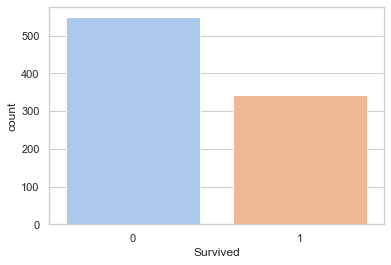

In [215]:
sns.countplot(data['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

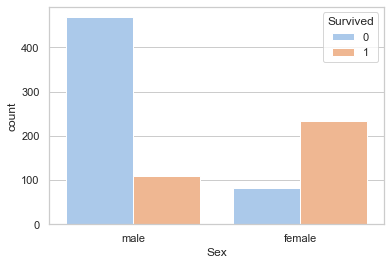

In [216]:
sns.countplot(data=data, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

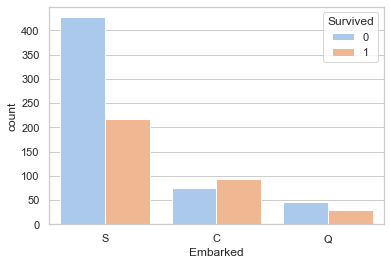

In [217]:
sns.countplot(data=data, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

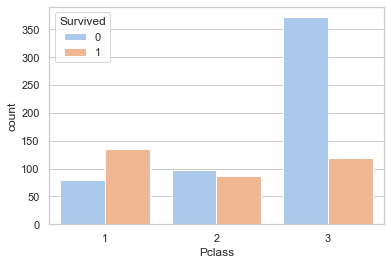

In [218]:
sns.countplot(data=data, x='Pclass', hue='Survived')

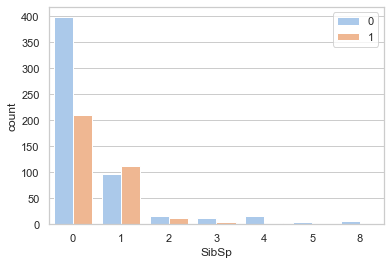

In [219]:
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.legend(loc='upper right')

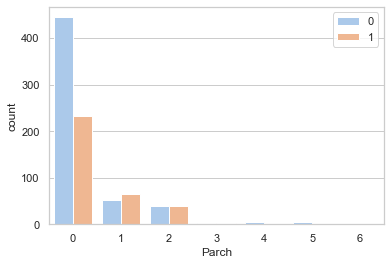

In [220]:
sns.countplot(data=data, x='Parch', hue='Survived')
plt.legend(loc='upper right')

## Немного о признаках

<AxesSubplot:xlabel='Age', ylabel='Survived'>

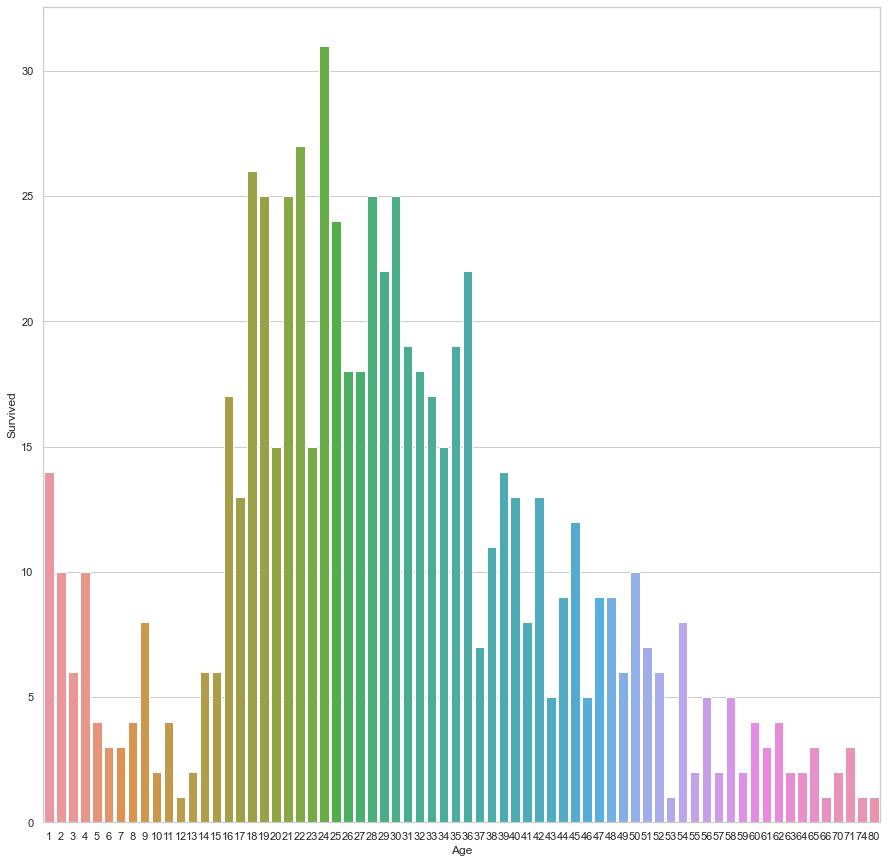

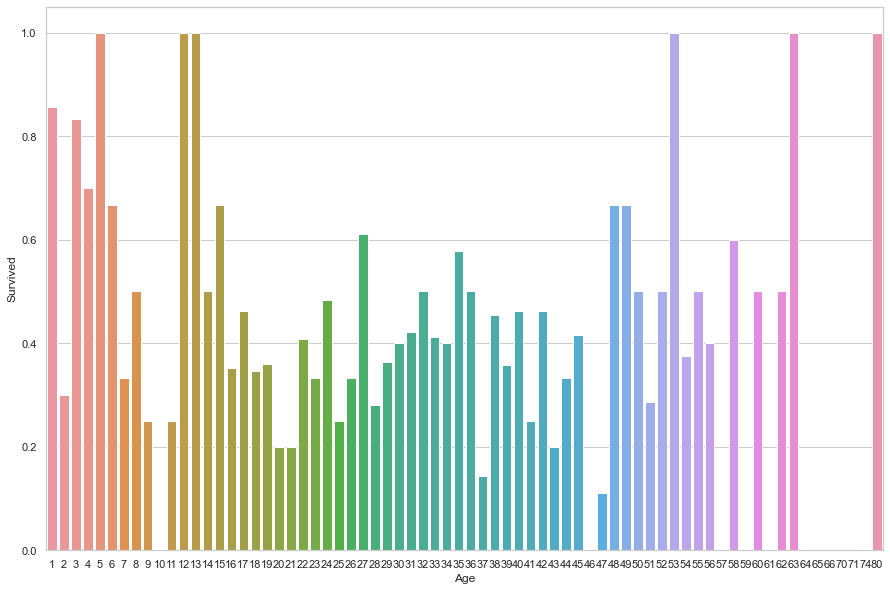

In [221]:
data_plot = data.groupby(by='Age').count()
plt.figure(figsize=(15, 15))
sns.barplot(data=data_plot, x=data_plot.index, y=data_plot['Survived'])

data_plot = data.groupby(by='Age').mean()
plt.figure(figsize=(15, 10))
sns.barplot(data=data_plot, x=data_plot.index, y=data_plot['Survived'])

In [222]:
# всего 30% без возраста выжили 
len(data[(data['Age'].isna()) & (data['Survived'] == 1)]) / len(data[(data['Age'].isna())])

0.2937853107344633

<AxesSubplot:xlabel='Age', ylabel='Survived'>

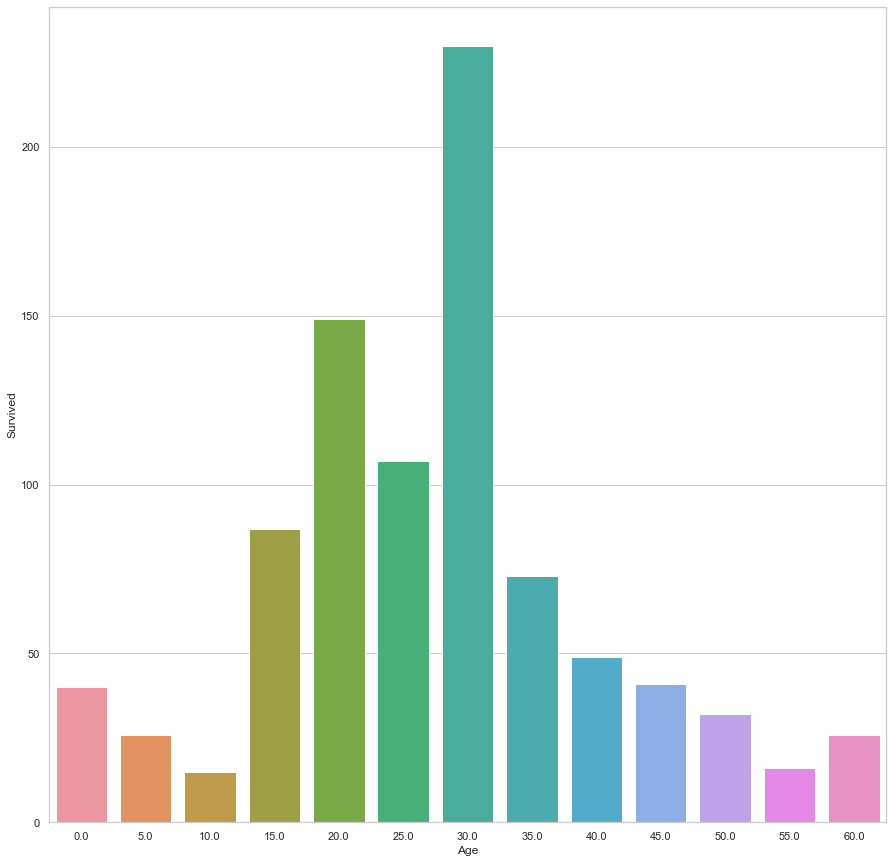

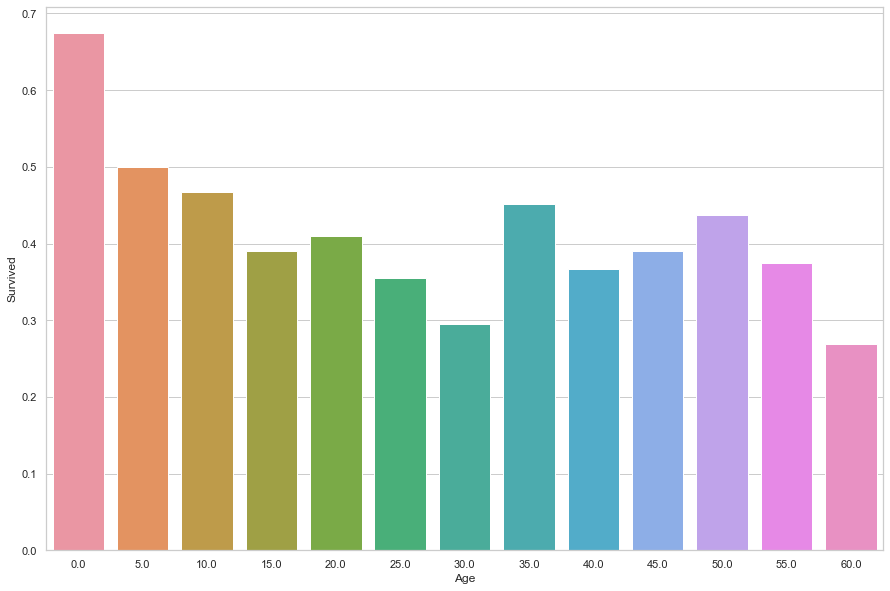

In [223]:
# Если поделить на отрезки в 5 лет
data1 = data.copy()
data1[(list(map(lambda i: 'Mrs.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Mrs.' in i, data1.Name)))].fillna(33)
data1[(list(map(lambda i: 'Mr.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Mr.' in i, data1.Name)))].fillna(31)
data1[(list(map(lambda i: 'Ms.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Ms.' in i, data1.Name)))].fillna(33)
data1[(list(map(lambda i: 'Miss.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Miss.' in i, data1.Name)))].fillna(20)
data1[(list(map(lambda i: 'Master.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Master.' in i, data1.Name)))].fillna(5)
data1[(list(map(lambda i: 'Dr.' in i, data1.Name)))] = data1[(list(map(lambda i: 'Dr.' in i, data1.Name)))].fillna(43)
data1['Age'] = data1['Age'].apply(lambda x: 60.0 if x > 60 else x-x%5)

data_plot = data1.groupby(by='Age').count()
plt.figure(figsize=(15, 15))
sns.barplot(data=data_plot, x=data_plot.index, y=data_plot['Survived'])

data_plot = data1.groupby(by='Age').mean()
plt.figure(figsize=(15, 10))
sns.barplot(data=data_plot, x=data_plot.index, y=data_plot['Survived'])

<AxesSubplot:xlabel='Fare'>

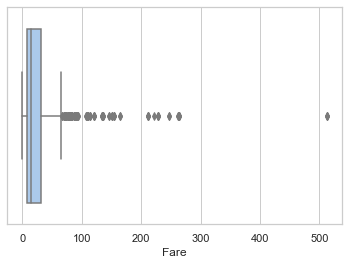

In [224]:
sns.boxplot(data['Fare'])

In [225]:
# Доля выживших среди богатых
len(data[(data['Fare'] > 100)&(data['Survived'] == 1)])/len(data[data['Fare'] > 100])

0.7358490566037735

In [226]:
data[data['Parch'] >= 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24,0,3,2666,19.2583,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,<NA>,8,2,CA. 2343,69.5500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q


In [227]:
data['Cabin'] = data['Cabin'].apply(lambda x: 'A' if pd.notna(x) and 'A' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'B' if pd.notna(x) and 'B' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'C' if pd.notna(x) and 'C' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'D' if pd.notna(x) and 'D' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'E' if pd.notna(x) and 'E' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'F' if pd.notna(x) and 'F' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'G' if pd.notna(x) and 'G' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: 'T' if pd.notna(x) and 'T' in x else x)
data['Cabin'] = data['Cabin'].fillna('NaN')
data['Cabin'].unique()

array(['NaN', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

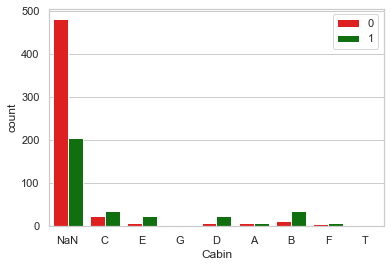

In [228]:
sns.countplot(data=data, x='Cabin', hue='Survived', palette=['red', 'green'])
plt.legend(loc='upper right')

In [229]:
data['Cabin'] = data['Cabin'].apply(lambda x: '0' if pd.notna(x) and 'A' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if pd.notna(x) and 'B' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if pd.notna(x) and 'C' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if pd.notna(x) and 'D' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if pd.notna(x) and 'E' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if pd.notna(x) and 'F' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '0' if pd.notna(x) and 'G' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '0' if pd.notna(x) and 'T' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '0' if pd.notna(x) and 'NaN' in x else x)

# data['Cabin'] = data['Cabin'].fillna('0')
data['Cabin'].unique()

array(['0', '1'], dtype=object)

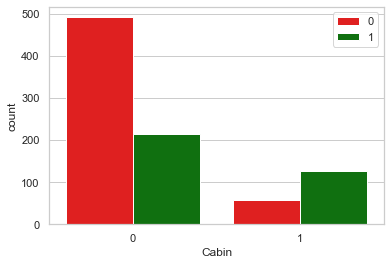

In [230]:
# Можно попробовать использовать, но выборки дисбалансные
sns.countplot(data=data, x='Cabin', hue='Survived', palette=['red', 'green'])
plt.legend(loc='upper right')

In [231]:
# Conclusion: apparently the ticket was sold for the whole group at once
data[data['Ticket'] == '19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0,1,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0,1,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0,1,S
438,439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263.0,1,S


In [232]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [233]:
data['Name'] = data['Name'].apply(lambda x: 'Mr' if 'Mr.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Miss' if 'Miss.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Mrs' if 'Mrs.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Rev' if 'Rev.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Master' if 'Master.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Don' if 'Don.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Dr' if 'Dr.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Major' if 'Major.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Mme' if 'Mme.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Lady' if 'Lady.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Sir' if 'Sir.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Ms' if 'Ms.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Col' if 'Col.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Mlle' if 'Mlle.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Capt' if 'Capt.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Countess' if 'Countess.' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Jonkheer' if 'Jonkheer.' in x else x)
data['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [234]:
data[data['Name']=='Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
443,444,1,2,Ms,female,28,0,0,230434,13.0,0,S


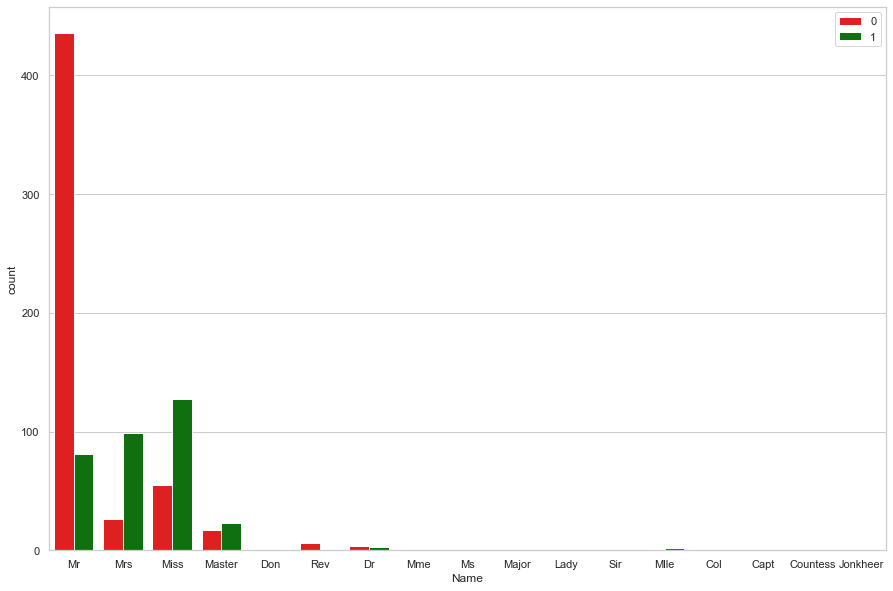

In [235]:
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='Name', hue='Survived', palette=['red', 'green'])
plt.legend(loc='upper right')

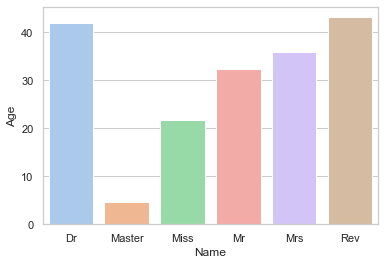

In [236]:
data_plot = data[(data['Name'] == 'Mr') | (data['Name'] == 'Miss') | (data['Name'] == 'Mrs')
             | (data['Name'] == 'Master') | (data['Name'] == 'Rev') 
                 | (data['Name'] == 'Dr')].groupby(by='Name').mean()
sns.barplot(data=data_plot, x=data_plot.index, y=data_plot['Age'])
plt.show()

In [237]:
data1 = data[(data['Name'] != 'Mr') & (data['Name'] != 'Miss') & (data['Name'] != 'Mrs')
             & (data['Name'] != 'Master')]
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,Don,male,40,0,0,PC 17601,27.7208,0,C
149,150,0,2,Rev,male,42,0,0,244310,13.0000,0,S
150,151,0,2,Rev,male,51,0,0,S.O.P. 1166,12.5250,0,S
245,246,0,1,Dr,male,44,2,0,19928,90.0000,1,Q
249,250,0,2,Rev,male,54,1,0,244252,26.0000,0,S
317,318,0,2,Dr,male,54,0,0,29011,14.0000,0,S
369,370,1,1,Mme,female,24,0,0,PC 17477,69.3000,1,C
398,399,0,2,Dr,male,23,0,0,244278,10.5000,0,S
443,444,1,2,Ms,female,28,0,0,230434,13.0000,0,S
449,450,1,1,Major,male,52,0,0,113786,30.5000,1,S


In [240]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [261]:
print(data[(data['SibSp'] == 0) & (data['Parch'] == 0) & (data['Sex'] == 'female')]['Survived'].mean())
print(data[(data['Sex'] == 'female')]['Survived'].mean())

0.7857142857142857
0.7420382165605095


In [249]:
data[data['Ticket'] == '3101278']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
85,86,1,3,Mrs,female,33,3,0,3101278,15.85,0,S
206,207,0,3,Mr,male,32,1,0,3101278,15.85,0,S


In [263]:
data[data['Parch'] == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,Mr,male,39,1,5,347082,31.2750,0,S
25,26,1,3,Mrs,female,38,1,5,347077,31.3875,0,S
610,611,0,3,Mrs,female,39,1,5,347082,31.2750,0,S
638,639,0,3,Mrs,female,41,0,5,3101295,39.6875,0,S
885,886,0,3,Mrs,female,39,0,5,382652,29.1250,0,Q


In [266]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Анализ пропущенных значений

In [238]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,Miss,female,38,0,0,113572,80.0,1,NaN
829,830,1,1,Mrs,female,62,0,0,113572,80.0,1,NaN
